# Read Dataset

In [1]:
import pandas as pd

from sklearn.datasets import make_regression

df = pd.read_csv("../datasets/dummy_sample_regression.csv")
df.sample(5)

,X (feature),y (target)
25,0.767435,73.430341
24,-0.225776,3.429124
12,-0.908024,-63.435529
23,0.375698,46.702969
8,0.314247,22.695928


# Dataset Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X (feature)  30 non-null     float64
 1   y (target)   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Split X (feature) and y (target)

In [3]:
X = df.iloc[:, 0].to_numpy().reshape(-1, 1)
y = df.iloc[:, 1].to_numpy().reshape(-1, 1)

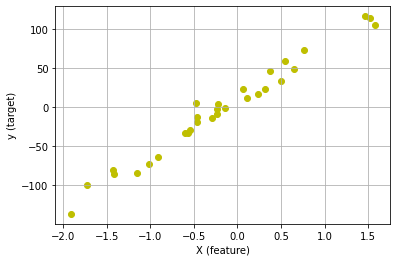

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c="y")
plt.xlabel("X (feature)")
plt.ylabel("y (target)")
plt.grid();

# Build Model

Model yang digunakan adalah regresi linier. Regresi linier dapat dirumuskan dengan persamaan $y = Wx + b$, dimana $y = prediksi$, $W = Weight~(bobot)$, $x = fitur$, dan $b = bias$. Model regresi linier mencari nilai $W$ dan $b$ yang sesuai sehingga *error* yang dihasilkan dari prediksi menjadi sekecil mungkin.

Jika anda mengalami kesulitan dalam mengerti persamaan matematikanya, penjelasan lainnya secara konsep adalah membuat sebuah garis lurus lalu posisikan garis lurus tersebut sedemikian rupa sehingga bisa menghampiri semua sampel.

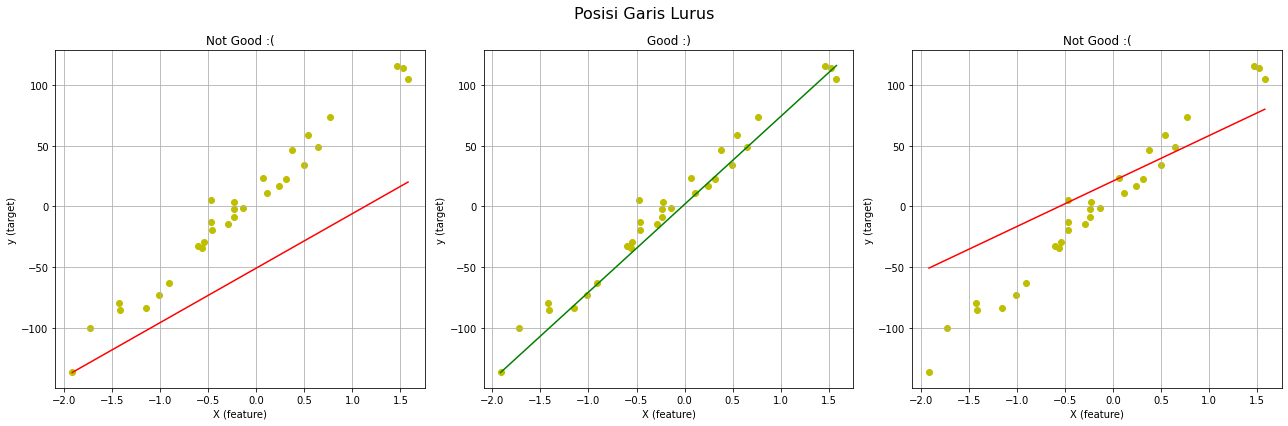

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(18, 6), tight_layout=True)

fig.suptitle("Posisi Garis Lurus", size=16)

ax[0].set(
    title="Not Good :(",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[0].grid()
ax[0].scatter(X, y, c="y")
ax[0].plot([-1.913280244657798, 1.5792128155073917], [-136.7458953721814, 20.10575724343158], c="r")

ax[1].set(
    title="Good :)",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[1].grid()
ax[1].scatter(X, y, c="y")
ax[1].plot([-1.913280244657798, 1.5792128155073917], [-136.7458953721814, 116.10575724343158], c="g")

ax[2].set(
    title="Not Good :(",
    xlabel="X (feature)",
    ylabel="y (target)",
)
ax[2].grid()
ax[2].scatter(X, y, c="y")
ax[2].plot([-1.913280244657798, 1.5792128155073917], [-50.7458953721814, 80.10575724343158], c="r");

## Train Model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f"Weight : {model.coef_.item()}")
print(f"Bias   : {model.intercept_}")

Weight : 69.42349548873685
Bias   : [9.87097059]


## Prediction

In [7]:
y_preds = model.predict(X)
y_preds

array([[ -70.03502684],
       [ -29.16499516],
       [   0.27217951],
       [  -6.38363538],
       [ 115.60502696],
       [ -60.44330612],
       [  17.5716045 ],
       [  26.66883726],
       [  31.68711887],
       [ -88.17608904],
       [ -22.72158232],
       [ -22.30110551],
       [ -53.16723472],
       [ 119.50544437],
       [  47.53738533],
       [ 111.62143129],
       [  14.55901461],
       [ -27.92198103],
       [-122.95563184],
       [-109.87885477],
       [ -31.82746679],
       [ -10.37942913],
       [  44.35460335],
       [  35.95324028],
       [  -5.80320938],
       [  63.14897205],
       [ -22.46161685],
       [  54.8357729 ],
       [  -6.38477516],
       [ -89.04002868]])

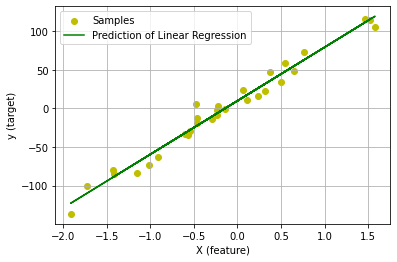

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c="y", label="Samples")
plt.plot(X, y_preds, c="g", label="Prediction of Linear Regression")
plt.xlabel("X (feature)")
plt.ylabel("y (target)")
plt.legend()
plt.grid();

# Evaluate

## R-Squared, Explained Variance, and RMSE (Root Mean Square Error)

- [R-Squared Explanantion](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination)
- [Mean Squared Error Explanation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
- [Explained Variance Explanation](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score)

In [9]:
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error

def score_summary(pretrained_model, X, y):
    y_preds = model.predict(X)
    
    print(f"r2_score                 : {r2_score(y, y_preds)}")
    print(f"root_mean_squared_error  : {mean_squared_error(y, y_preds, squared=False)}")
    print(f"explained_variance_score : {explained_variance_score(y, y_preds)}")
    
score_summary(model, X, y)

r2_score                 : 0.9750528924547933
root_mean_squared_error  : 9.826219729820023
explained_variance_score : 0.9750528924547933


## Residual Plot

[Interpreting Residual Plot](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)

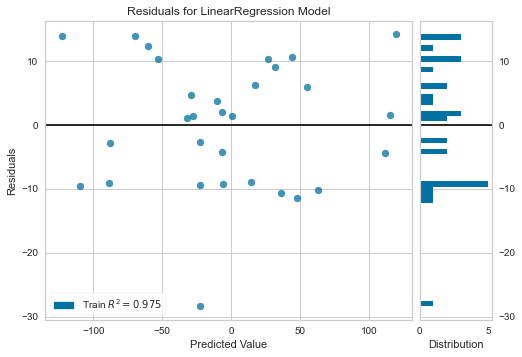

In [10]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X, y)
visualizer.show();

***
Semoga bermanfaat yah 😄

*Dibuat dengan penuh 💚 oleh [haloapping](https://haloapping.github.io/)*
***